# 时间序列与时间序列分析
在生产和科学研究中，对某一个或者一组变量 x(t)x(t) 进行观察测量，将在一系列时刻 t1,t2,⋯,tnt1,t2,⋯,tn 所得到的离散数字组成的序列集合，称之为时间序列。
时间序列分析是根据系统观察得到的时间序列数据，通过曲线拟合和参数估计来建立数学模型的理论和方法。时间序列分析常用于国民宏观经济控制、市场潜力预测、气象预测、农作物害虫灾害预报等各个方面。

# 时间序列建模基本步骤
获取被观测系统时间序列数据；
对数据绘图，观测是否为平稳时间序列；对于非平稳时间序列要先进行d阶差分运算，化为平稳时间序列；
经过第二步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数ACF 和偏自相关系数PACF ，通过对自相关图和偏自相关图的分析，得到最佳的阶层 p 和阶数 q
由以上得到的d、q、pd、q、p ，得到ARIMA模型。然后开始对得到的模型进行模型检验。
# ARIMA实战解剖
原理大概清楚，实践却还是会有诸多问题。相比较R语言，Python在做时间序列分析的资料相对少很多。下面就通过Python语言详细解析后三个步骤的实现过程。
文中使用到这些基础库： pandas,numpy,scipy,matplotlib,statsmodelspandas,numpy,scipy,matplotlib,statsmodels。 对其调用如下

In [33]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

2001-12-31    10930
2002-12-31    10318
2003-12-31    10595
2004-12-31    10972
2005-12-31     7706
              ...  
2086-12-31    15845
2087-12-31    15271
2088-12-31    14686
2089-12-31    11054
2090-12-31    10395
Length: 90, dtype: int64

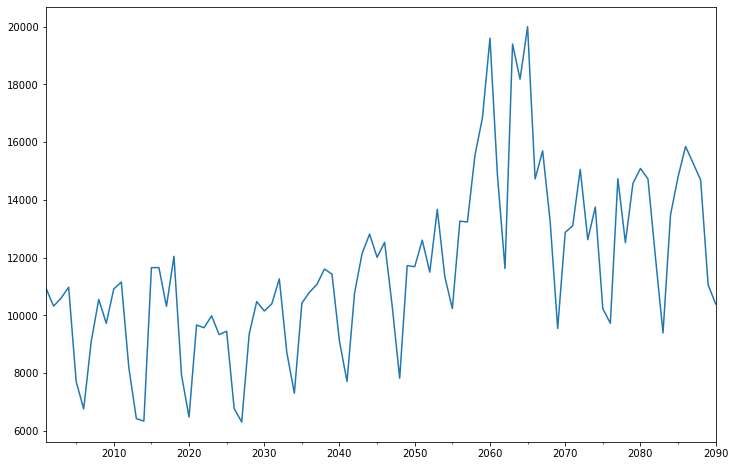

In [34]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

dta=pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
dta.plot(figsize=(12,8))

dta

# 时间序列的差分d
ARIMA 模型对时间序列的要求是平稳型。因此，当你得到一个非平稳的时间序列时，首先要做的即是做时间序列的差分，直到得到一个平稳时间序列。如果你对时间序列做d次差分才能得到一个平稳序列，那么可以使用ARIMA(p,d,q)模型，其中d是差分次数。

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

一阶差分的时间序列的均值和方差已经基本平稳，不过我们还是可以比较一下二阶差分的效果

In [ ]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

可以看出二阶差分后的时间序列与一阶差分相差不大，并且二者随着时间推移，时间序列的均值和方差保持不变。因此可以将差分次数d设置为1。
其实还有针对平稳的检验，叫“ADF单位根平稳型检验”，以后再更。

# 合适的p,q
现在我们已经得到一个平稳的时间序列，接来下就是选择合适的ARIMA模型，即ARIMA模型中合适的p,qp,q。
第一步我们要先检查平稳时间序列的自相关图和偏自相关图。

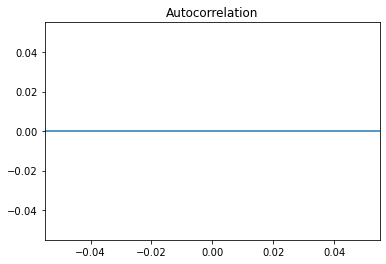

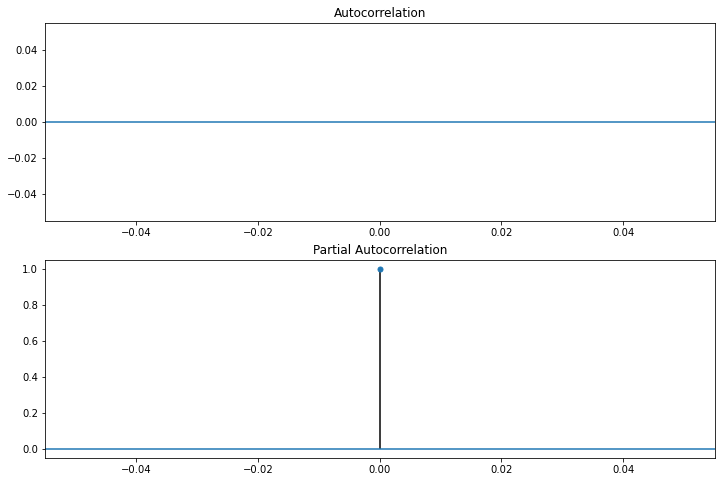

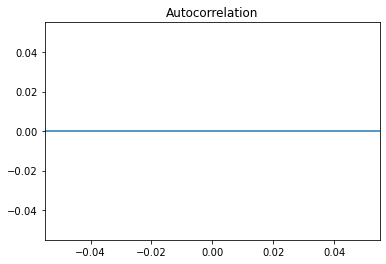

In [39]:
diff1= dta.diff(1)#我们已经知道要使用一阶差分的时间序列，之前判断差分的程序可以注释掉 //原文有错误应该是diff1= dta.diff(1)，而非dta= dta.diff(1)
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)